#Importing all the libraries



In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Load the dataset

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the Dataset

In [5]:
X_trainPath = '/content/drive/MyDrive/ML Lab final/Qn1/train'
X_testPath = '/content/drive/MyDrive/ML Lab final/Qn1/test'
X_valPath = '/content/drive/MyDrive/ML Lab final/Qn1/val'

image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

ds_train = image_datagen.flow_from_directory(
    X_trainPath,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'
)

ds_test = image_datagen.flow_from_directory(
    X_testPath,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'
)

ds_val = image_datagen.flow_from_directory(
    X_valPath,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'
)

Found 5226 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.



# Print some images with their level


Class Indices:
{'NORMAL': 0, 'PNEUMONIA': 1}

Actual Class Labels:
['PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'PNEUMONIA']


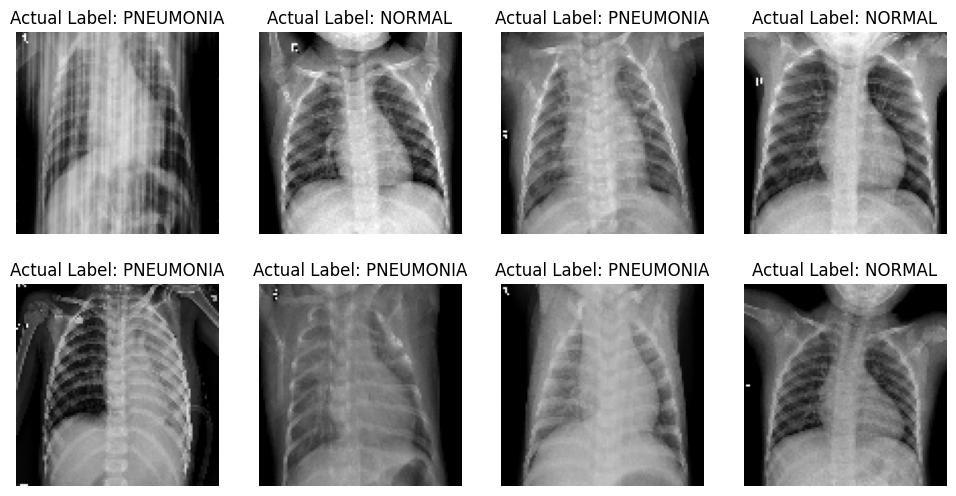

In [6]:
batch_images, batch_label = next(ds_train)

class_indices = ds_train.class_indices
print("\nClass Indices:")
print(class_indices)
actual_labels = [list(class_indices.keys())[list(class_indices.values()).index(label)] for label in batch_label]
print("\nActual Class Labels:")
print(actual_labels)
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(batch_images[i])
    plt.title(f"Actual Label: {actual_labels[i]}")
    plt.axis('off')

plt.show()

#Creating model

In [7]:
myModel = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

myModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dense (Dense)               (None, 64)                1

# Compile the model

In [8]:
myModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Using Function

In [9]:
history = myModel.fit(ds_train, validation_data=ds_val, epochs=10, verbose=1)

Epoch 1/10
164/164 [==============================] - 1142s 7s/step - loss: 0.2368 - accuracy: 0.9005 - val_loss: 0.2296 - val_accuracy: 0.8750
Epoch 2/10
164/164 [==============================] - 155s 942ms/step - loss: 0.1075 - accuracy: 0.9617 - val_loss: 0.5164 - val_accuracy: 0.6875
Epoch 3/10
164/164 [==============================] - 150s 912ms/step - loss: 0.0875 - accuracy: 0.9665 - val_loss: 0.4611 - val_accuracy: 0.8125
Epoch 4/10
164/164 [==============================] - 150s 913ms/step - loss: 0.0758 - accuracy: 0.9726 - val_loss: 0.3387 - val_accuracy: 0.7500
Epoch 5/10
164/164 [==============================] - 156s 950ms/step - loss: 0.0559 - accuracy: 0.9807 - val_loss: 0.1717 - val_accuracy: 0.9375
Epoch 6/10
164/164 [==============================] - 149s 909ms/step - loss: 0.0618 - accuracy: 0.9772 - val_loss: 0.4339 - val_accuracy: 0.8125
Epoch 7/10
164/164 [==============================] - 150s 914ms/step - loss: 0.0363 - accuracy: 0.9860 - val_loss: 0.3828 - v

#Evaluate with test data

In [10]:
result = myModel.evaluate(ds_test)
print("test loss : ",result[0])
print("test accuracy : ",result[1])

20/20 [==============================] - 137s 7s/step - loss: 1.8102 - accuracy: 0.7580
test loss :  1.810186743736267
test accuracy :  0.7580128312110901
